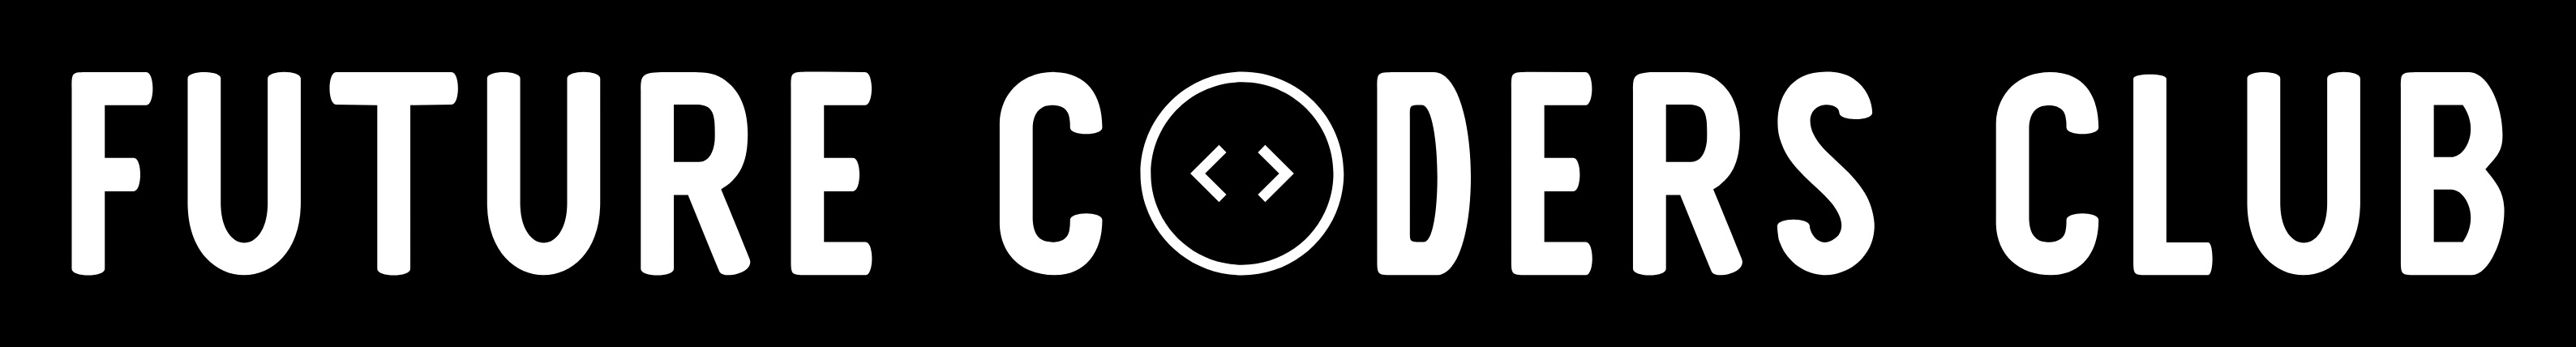

## Section 5: Data Visualisations with Python and Tableau
Goals:
- Cover pizza plots and other basic charts in Python
- Cover the fundamentals of Tableau, including all the typical charts

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager
import numpy as np

In [5]:
data = {
    'Player': ['Player A', 'Player B', 'Player C', 'Player D'],
    'Season': ['2023/24', '2023/24', '2023/24', '2023/24'],
    'Team within selected timeframe': ['Team X', 'Team Y', 'Team X', 'Team Z'],
    'Position': ['CB', 'FB', 'CM', 'WIDE'],
    "Defensive duels won, %": [70, 65, 50, 40],
    "Aerial duels won, %": [75, 60, 40, 35],
    "PAdj Interceptions": [80, 70, 60, 50],
    "Progressive runs per 90": [20, 30, 40, 50],
    "Successful dribbles per 90": [30, 40, 50, 70],
    'Progressive passes per 90': [60, 70, 80, 50],
    'Passes to final third per 90': [50, 60, 70, 40],
    'Accurate progressive passes, %': [80, 78, 70, 60],
    'Accurate passes to final third, %': [70, 72, 65, 55],
    'Accurate long passes, %': [60, 50, 40, 30],
    'Dangerous attacking actions per 90': [40, 50, 70, 90],
    'Successful defensive actions per 90': [50, 60, 70, 80],
    'Through passes per 90': [40, 30, 20, 10],
    'xA per 90': [10, 20, 30, 40],
    'xG per 90': [20, 30, 40, 50],
    'xA/shot assist': [30, 40, 50, 60],
    'xG/shot': [40, 50, 60, 70],
    'xG performance': [50, 60, 70, 80],
    'Passes to penalty area per 90': [30, 40, 50, 60],
    'Deep completions per 90': [20, 30, 40, 50],
    'Accurate short / medium passes, %': [85, 80, 75, 70] 
}

In [6]:
df = pd.DataFrame(data)

In [7]:
playerCB_data = df[df['Position'] == 'CB']
print(playerCB_data)

     Player   Season Team within selected timeframe Position  \
0  Player A  2023/24                         Team X       CB   

   Defensive duels won, %  Aerial duels won, %  PAdj Interceptions  \
0                      70                   75                  80   

   Progressive runs per 90  Successful dribbles per 90  \
0                       20                          30   

   Progressive passes per 90  ...  Successful defensive actions per 90  \
0                         60  ...                                   50   

   Through passes per 90  xA per 90  xG per 90  xA/shot assist  xG/shot  \
0                     40         10         20              30       40   

   xG performance  Passes to penalty area per 90  Deep completions per 90  \
0              50                             30                       20   

   Accurate short / medium passes, %  
0                                 85  

[1 rows x 25 columns]


In [8]:
df.loc[0]

Player                                 Player A
Season                                  2023/24
Team within selected timeframe           Team X
Position                                     CB
Defensive duels won, %                       70
Aerial duels won, %                          75
PAdj Interceptions                           80
Progressive runs per 90                      20
Successful dribbles per 90                   30
Progressive passes per 90                    60
Passes to final third per 90                 50
Accurate progressive passes, %               80
Accurate passes to final third, %            70
Accurate long passes, %                      60
Dangerous attacking actions per 90           40
Successful defensive actions per 90          50
Through passes per 90                        40
xA per 90                                    10
xG per 90                                    20
xA/shot assist                               30
xG/shot                                 

In [9]:
def get_purp_shade(value):
    min_purp = np.array([200, 180, 255])
    max_purp = np.array([75, 0, 110])
    color = min_purp + (max_purp - min_purp) * (value / 100)
    return f"#{int(color[0]):02X}{int(color[1]):02X}{int(color[2]):02X}"

In [12]:
def plot_player(df, player_name, season, position, team):
    player_data = df[(df['Player'] == player_name) & (df['Season'] == season) & (df['Team within selected timeframe'] == team)]

    if player_data.empty:
        print("N/A: Player or season does not exist.")
        return None

    # Position-specific columns
    position_columns = {
        'CB': ["Defensive duels won, %", "Aerial duels won, %", "PAdj Interceptions", "Progressive runs per 90", "Successful dribbles per 90", 'Progressive passes per 90', 'Passes to final third per 90', 'Accurate progressive passes, %', 'Accurate passes to final third, %', 'Accurate long passes, %'],
        'FB': ["Defensive duels won, %", "Aerial duels won, %", "PAdj Interceptions", "Progressive runs per 90", "Successful dribbles per 90", 'Progressive passes per 90', 'Passes to final third per 90', 'Accurate progressive passes, %', 'Accurate passes to final third, %', 'Dangerous attacking actions per 90'],
        'CM': ["Successful defensive actions per 90", "Progressive runs per 90", "Successful dribbles per 90", 'Progressive passes per 90', 'Passes to final third per 90', 'Accurate progressive passes, %', 'Through passes per 90', 'xA per 90', 'xG per 90', 'Dangerous attacking actions per 90'],
        'WIDE': ["Successful defensive actions per 90", "Progressive runs per 90", "Successful dribbles per 90", 'Fouls suffered per 90', 'Passes to final third per 90', 'Key passes per 90', 'xA per 90', 'xA/shot assist', 'xG per 90', 'Dangerous attacking actions per 90'],
        'FW': ['Accurate short / medium passes, %', 'Passes to penalty area per 90', "Successful dribbles per 90", 'Deep completions per 90', 'xA per 90', 'xA/shot assist', 'xG per 90', 'xG/shot', 'xG performance', 'Dangerous attacking actions per 90']
    }

    # Select columns based on position
    selected_columns = position_columns.get(position)

    # Get values for selected columns and flatten into 2d
    values = player_data[selected_columns].values.flatten()

    # Format values into integers - to remove decimals as it makes plot look worse
    formatted_values = [int(round(v)) for v in values]

    # Error handling if x required metrics != x values
    if len(selected_columns) != len(formatted_values):
        print(f"Error: Length of params ({len(selected_columns)}) and values ({len(formatted_values)}) do not match for player {player_name} in season {season}.")
        return None

    params = selected_columns

    # Set slice colors based on value intensity (using get_black_shade)
    slice_colors = [get_purp_shade(v) for v in formatted_values]

    # Create figure + assign figure background color
    fig, ax = plt.subplots(figsize=(8, 8.5), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor("#0E1118")

    # Radar chart (graph) background color to white
    ax.set_facecolor("#FFFFFF")

    # Standard formatting to create radar/pizza copied from mpl soccer
    baker = PyPizza(
        params=params,
        background_color="#FFFFFF",  # Set the radar chart background to white
        straight_line_color="#000000",  # Light gray grid lines
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_lw=0,
        inner_circle_size=0
    )

    baker.make_pizza(
        formatted_values,
        ax=ax,
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=["#FFFFFF"] * len(selected_columns),
        value_bck_colors=["#000000"] * len(selected_columns),
        blank_alpha=0.4,
        kwargs_slices=dict(edgecolor="#000000", zorder=2, linewidth=1),
        kwargs_params=dict(color="#FFFFFF", fontsize=8),
        kwargs_values=dict(color="#000000", fontsize=10, zorder=3,
                           bbox=dict(edgecolor="#FFFFFF", facecolor="#000000", boxstyle="round,pad=0.2", lw=1))
    )

    caption = (player_name + ', ' + team + ', ' + position) 
    # Captions for player name and season
    fig.text(0.516, 0.918, caption, size=12, ha="center",
             fontproperties=FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf').prop, color="#FC554E")
    fig.text(0.516, 0.955, 'FUTURE CODERS CLUB', size=32, ha="center",
             fontproperties=FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab[wght].ttf').prop, color="#fc554e")
    fig.text(0.516, 0.0555, 'Want to learn to create visuals like this? Visit futurecodersclub.com', size=10, ha="center",
             fontproperties=FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf').prop, color="#FFFFFF")

    return fig

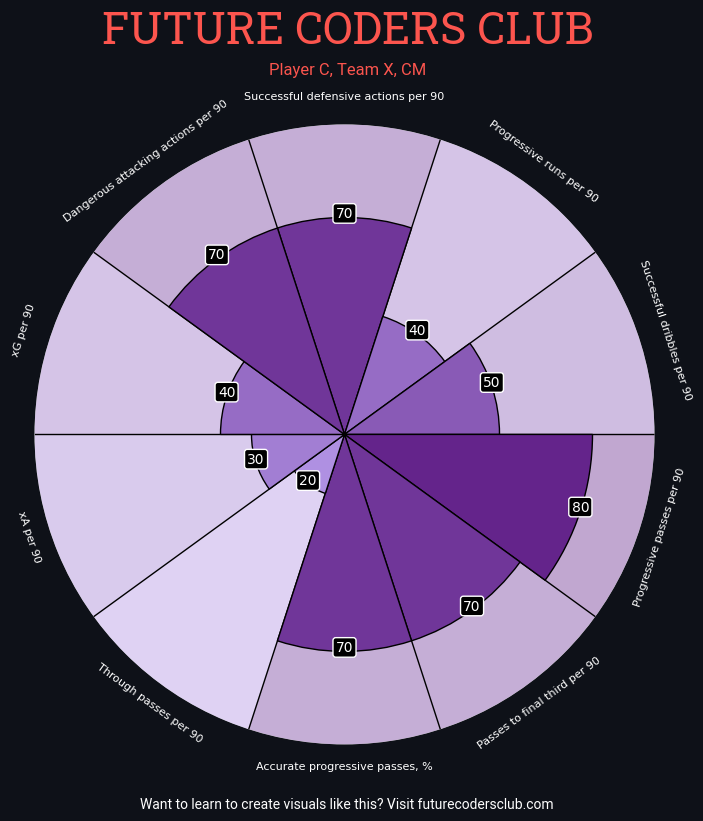

In [13]:
fig = plot_player(df, player_name='Player C', season='2023/24', position='CM', team='Team X')
plt.show()